In [104]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix,f1_score
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [105]:
# Reading the data
data= pd.read_excel(r"C:\Users\SJONGERD\Desktop\HR Analytics Data_AAE_Masked_v2.xlsx",sheet_name='AAE')
print(data.shape)

(10532, 48)


In [106]:
# removing unnecessary columns
data=data.drop(['BU Vol Attr % 2018','BU Vol Attr % 2019','BU Vol Attr % 2020','Account Name','Cost Centre','Designation','Buss. Area','Global Practice'],axis=1)
data.shape

(10532, 40)

In [107]:
data.isna().sum()

Masked ID                                          0
Gender                                             0
CITY                                               0
Flash Grade                                        0
Discipline                                         0
Sub-BU name                                        0
Status                                             0
Resignation Status                                 0
Resignation Date                                   0
LWD                                              299
Highest Education                                  0
Previous_Year_Exp in Yr                            4
CG Experience in Yr                                0
No_of_companies worked                             0
Tenure_in_Project                               4583
Pay_Position_2020_BU                             644
Rating 2018                                     4824
Rating 2019                                     3793
Rating 2020                                   

In [108]:
for col in data.columns:
    if data[col].isna().sum()>0:
        print(col)

LWD
Previous_Year_Exp in Yr
Tenure_in_Project
Pay_Position_2020_BU
Rating 2018
Rating 2019
Rating 2020
Engagement Score at Account level (Jan 21)
Engagement Score at Practice level (Jan 21)
Engagement Score at Grade level (Jan 21)
Engagement Score at Account level (Feb 21)
Engagement Score at Practice level (Feb 21)
Engagement Score at Grade level (Feb 21)
Engagement Score at Account level (Mar 21)
Engagement Score at Practice level (Mar 21)
R&R 2018
R&R 2019
R&R 2020
Skill Bonus 2020
Retention Bonus 2020


In [109]:
# Missing_Values Treatment

In [110]:
data['Retention Bonus 2020']=data['Retention Bonus 2020'].fillna('No')
data['R&R 2018']=data['R&R 2018'].fillna('No')
data['R&R 2019'] = data['R&R 2019'].str.capitalize()
data['R&R 2020'] = data['R&R 2020'].str.capitalize()
data['R&R 2019']=data['R&R 2019'].fillna('No')
data['R&R 2020']=data['R&R 2020'].fillna('No')
data['Skill Bonus 2020']=data['Skill Bonus 2020'].fillna('No')
data['No_of_companies worked']=data['No_of_companies worked'].replace(" -", '0')
data['Highest Education']=data['Highest Education'].str.replace('-','Not Available')

data['Engagement Score at Account level (Jan 21)'] = data['Engagement Score at Account level (Jan 21)'].fillna(data['Engagement Score at Account level (Jan 21)'].median())
data['Engagement Score at Practice level (Jan 21)'] = data['Engagement Score at Practice level (Jan 21)'].fillna(data['Engagement Score at Practice level (Jan 21)'].median())
data['Engagement Score at Grade level (Jan 21)'] = data['Engagement Score at Grade level (Jan 21)'].fillna(data['Engagement Score at Grade level (Jan 21)'].median())

data['Engagement Score at Account level (Feb 21)'] = data['Engagement Score at Account level (Feb 21)'].fillna(data['Engagement Score at Account level (Feb 21)'].median())
data['Engagement Score at Practice level (Feb 21)'] = data['Engagement Score at Practice level (Feb 21)'].fillna(data['Engagement Score at Practice level (Feb 21)'].median())
data['Engagement Score at Grade level (Feb 21)'] = data['Engagement Score at Grade level (Feb 21)'].fillna(data['Engagement Score at Grade level (Feb 21)'].median())

data['Engagement Score at Account level (Mar 21)'] = data['Engagement Score at Account level (Mar 21)'].fillna(data['Engagement Score at Account level (Mar 21)'].median())
data['Engagement Score at Practice level (Mar 21)'] = data['Engagement Score at Practice level (Mar 21)'].fillna(data['Engagement Score at Practice level (Mar 21)'].median())
data['Engagement Score at Grade level (Mar 21)'] = data['Engagement Score at Grade level (Mar 21)'].fillna(data['Engagement Score at Grade level (Mar 21)'].median())

data['Tenure_in_Project'] = data['Tenure_in_Project'].fillna(0)
data['Pay_Position_2020_BU'] = data['Pay_Position_2020_BU'].fillna(data['Pay_Position_2020_BU'].median())

data['Rating 2018']=data['Rating 2018'].fillna(3)
data['Rating 2019']=data['Rating 2019'].fillna(3)
data['Rating 2020']=data['Rating 2020'].fillna(3)

data['Rating 2018']=data['Rating 2018'].replace(['Good','Exceptional','Needs attention','Needs Attention'],[2,1,5,5])
data['Rating 2019']=data['Rating 2019'].replace(['Good','Exceptional','Needs Attention'],[2,1,5])

data['Rating 2020']=data['Rating 2020'].astype('int64')
data['Rating 2020']= data['Rating 2020'].round(decimals=0)

data['Previous_Year_Exp in Yr']=data['Previous_Year_Exp in Yr'].fillna(0)


In [111]:
print(data["IJP's Applied"].value_counts())                                  
print(data["IJP's availed successfully"].value_counts())                     

NO     10283
Yes      249
Name: IJP's Applied, dtype: int64
NO     10523
Yes        9
Name: IJP's availed successfully, dtype: int64


In [112]:
data["IJP's Applied"].isna().sum()

0

In [113]:
data["IJP's availed successfully"].isna().sum()

0

In [114]:
data['Rating 2020']=data['Rating 2020'].astype('int64')
data['Rating 2019']=data['Rating 2019'].astype('int64')
data['Rating 2018']=data['Rating 2018'].astype('int64')

In [115]:
data = data.drop(columns = 'LWD')

In [116]:
data.isna().sum()

Masked ID                                      0
Gender                                         0
CITY                                           0
Flash Grade                                    0
Discipline                                     0
Sub-BU name                                    0
Status                                         0
Resignation Status                             0
Resignation Date                               0
Highest Education                              0
Previous_Year_Exp in Yr                        0
CG Experience in Yr                            0
No_of_companies worked                         0
Tenure_in_Project                              0
Pay_Position_2020_BU                           0
Rating 2018                                    0
Rating 2019                                    0
Rating 2020                                    0
Sub BU - Vol Attr% 2018                        0
Sub BU - Vol Attr%  2019%                      0
Sub BU - Vol Attr%  

In [117]:
data.head()

,Masked ID,Gender,CITY,Flash Grade,Discipline,Sub-BU name,Status,Resignation Status,Resignation Date,Highest Education,...,Engagement Score at Account level (Mar 21),Engagement Score at Practice level (Mar 21),Engagement Score at Grade level (Mar 21),R&R 2018,R&R 2019,R&R 2020,Skill Bonus 2020,Retention Bonus 2020,Travelled Onsite(Yes/No),Valid Visa (Yes/No)
0,10001,Male,Mumbai,D1,DSP,I&D Mgmt and others,A,Active,-,Bachelor's Degree,...,8.0,8.2,7.6,No,No,No,No,No,No,"Employee in India, No Valid Visa"
1,10002,Male,Pune,E1,CSS,I&D Cloud Data Platform,A,Serving NP,2021-04-05 00:00:00,Bachelor's Degree,...,8.1,8.1,8.1,No,No,No,No,No,No,"Employee in India, No Valid Visa"
2,10003,Male,Hyderabad,C2,CSS,I&D Core BI,A,Active,-,Not Available,...,7.9,8.1,7.7,No,No,No,No,No,Yes,"Employee in India, No Valid Visa"
3,10004,Female,Chennai,B2,CSS,I&D Cloud Data Platform,A,Active,-,HS or Equivalent,...,8.3,8.1,7.9,No,No,No,No,No,No,"Employee in India, No Valid Visa"
4,10005,Male,Bangalore,D1,CSS,I&D MDM,A,Serving NP,2021-04-16 00:00:00,Bachelor's Degree,...,8.0,7.9,7.6,No,No,No,No,No,No,"Employee in India, No Valid Visa"


In [118]:
data.dtypes

Masked ID                                        int64
Gender                                          object
CITY                                            object
Flash Grade                                     object
Discipline                                      object
Sub-BU name                                     object
Status                                          object
Resignation Status                              object
Resignation Date                                object
Highest Education                               object
Previous_Year_Exp in Yr                        float64
CG Experience in Yr                            float64
No_of_companies worked                          object
Tenure_in_Project                              float64
Pay_Position_2020_BU                           float64
Rating 2018                                      int64
Rating 2019                                      int64
Rating 2020                                      int64
Sub BU - V

In [119]:
data['RC18-19'] = data['Rating 2019'] - data['Rating 2018']
data['RC19-20'] = data['Rating 2020'] - data['Rating 2019']

In [120]:
data.drop(['Rating 2018','Rating 2019','Rating 2020', 'Resignation Status', 'Resignation Date'],axis=1,inplace=True)
data.shape

(10532, 36)

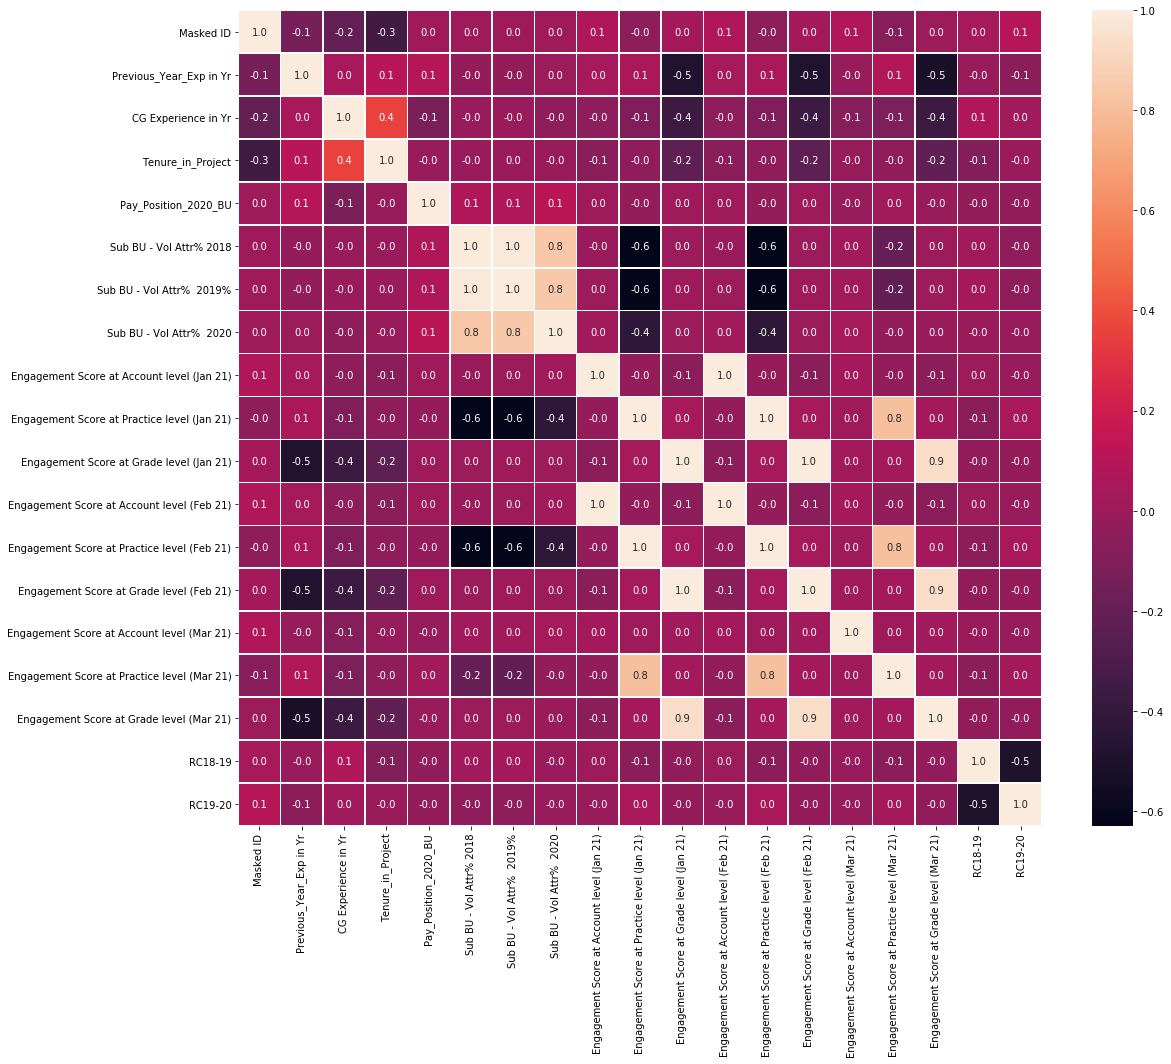

In [121]:
# Correlation Matrix
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [122]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

data = data.drop(columns = to_drop)

to_drop

There are 5 columns to remove :


['Sub BU - Vol Attr%  2019%',
 'Engagement Score at Account level (Feb 21)',
 'Engagement Score at Practice level (Feb 21)',
 'Engagement Score at Grade level (Feb 21)',
 'Engagement Score at Grade level (Mar 21)']

In [123]:
data.head(5)

,Masked ID,Gender,CITY,Flash Grade,Discipline,Sub-BU name,Status,Highest Education,Previous_Year_Exp in Yr,CG Experience in Yr,...,Engagement Score at Practice level (Mar 21),R&R 2018,R&R 2019,R&R 2020,Skill Bonus 2020,Retention Bonus 2020,Travelled Onsite(Yes/No),Valid Visa (Yes/No),RC18-19,RC19-20
0,10001,Male,Mumbai,D1,DSP,I&D Mgmt and others,A,Bachelor's Degree,5.901370,14.838356,...,8.2,No,No,No,No,No,No,"Employee in India, No Valid Visa",-1,0
1,10002,Male,Pune,E1,CSS,I&D Cloud Data Platform,A,Bachelor's Degree,6.416438,16.342466,...,8.1,No,No,No,No,No,No,"Employee in India, No Valid Visa",-1,0
2,10003,Male,Hyderabad,C2,CSS,I&D Core BI,A,Not Available,0.000000,9.539726,...,8.1,No,No,No,No,No,Yes,"Employee in India, No Valid Visa",0,0
3,10004,Female,Chennai,B2,CSS,I&D Cloud Data Platform,A,HS or Equivalent,0.000000,8.013699,...,8.1,No,No,No,No,No,No,"Employee in India, No Valid Visa",0,0
4,10005,Male,Bangalore,D1,CSS,I&D MDM,A,Bachelor's Degree,0.000000,19.347945,...,7.9,No,No,No,No,No,No,"Employee in India, No Valid Visa",0,0


In [124]:
# Converting Columns with Yes/No to 0/1:
data["IJP's Applied"] = data["IJP's Applied"].map({'Yes':0,'NO':1})
data["IJP's availed successfully"] = data["IJP's availed successfully"].map({'Yes':0,'NO':1})
data['R&R 2018'] = data['R&R 2018'].map({'Yes':0,'No':1})
data['R&R 2019'] = data['R&R 2019'].map({'Yes':0,'No':1})
data['R&R 2020'] = data['R&R 2020'].map({'Yes':0,'No':1})
data['Skill Bonus 2020'] = data['Skill Bonus 2020'].map({'Yes':0,'No':1})
data['Retention Bonus 2020'] = data['Retention Bonus 2020'].map({'Yes':0,'No':1})
data['Travelled Onsite(Yes/No)'] = data['Travelled Onsite(Yes/No)'].map({'Yes':0,'No':1})
data['Valid Visa (Yes/No)'] = data['Valid Visa (Yes/No)'].map({'Employee in India, No Valid Visa':1, 'Employee in India, Valid Visa':0, 'Employee Onsite':0})
data['Status']=data['Status'].map({'A':0,'T':1})
data['Flash Grade']=data['Flash Grade'].map({'C2':6, 'B2':4, 'D1':7, 'D2':8, 'C1':5, 'E2':10, 'E1':9, 'A5':2, 'A4':1, 'B1':3})

In [125]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data['CITY']=data['CITY'].map({'Hyderabad':1, 'Chennai':2, 'Bangalore':3, 'Pune':4, 'Mumbai':5, 'Kolkata':6,\
                               'Gurgaon':7, 'Noida':8, 'Gandhinagar':9})
data['Sub-BU name']=data['Sub-BU name'].map({'I&D Core BI':1, 'I&D Cloud Data Platform':2, 'I&D Big Data':3, 'I&D DM':4,\
                                             'I&D SAP':5, 'I&D Mkt Services & COEs':6, 'I&D ECM':7, 'I&D DS&A':8,\
                                             'I&D MDM':9, 'I&D Mgmt and others':10})
data['Highest Education']= data['Highest Education'].map({' Not Available':1, 'Not Available':1, 'HS or Equivalent':2, "Master's Degree":3,\
                                                          "Bachelor's Degree":4,'Diploma':5, 'Doctorate Degree':6,\
                                                          'Less Than HS':7, 'Postgraduate Diploma':8, 'Others':9,\
                                                          'First Professional':10})
data['Discipline']=data['Discipline'].map({'CSS':0, 'DSP':1})

In [154]:
data['Gender']=data['Gender'].astype('category')
data['CITY']=data['CITY'].astype('category')
data['Sub-BU name']=data['Sub-BU name'].astype('category')
data['Highest Education']=data['Highest Education'].astype('category')
data['Discipline']=data['Discipline'].astype('category')
data['No_of_companies worked']=data['No_of_companies worked'].astype('int')

In [155]:
data.isna().sum()

Masked ID                                      0
Gender                                         0
CITY                                           0
Flash Grade                                    0
Discipline                                     0
Sub-BU name                                    0
Status                                         0
Highest Education                              0
Previous_Year_Exp in Yr                        0
CG Experience in Yr                            0
No_of_companies worked                         0
Tenure_in_Project                              0
Pay_Position_2020_BU                           0
Sub BU - Vol Attr% 2018                        0
Sub BU - Vol Attr%  2020                       0
IJP's Applied                                  0
IJP's availed successfully                     0
Engagement Score at Account level (Jan 21)     0
Engagement Score at Practice level (Jan 21)    0
Engagement Score at Grade level (Jan 21)       0
Engagement Score at 

In [130]:
data.dropna(axis = 0, how = 'any', inplace = True)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10531
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Masked ID                                    10530 non-null  int64   
 1   Gender                                       10530 non-null  category
 2   CITY                                         10530 non-null  category
 3   Flash Grade                                  10530 non-null  float64 
 4   Discipline                                   10530 non-null  category
 5   Sub-BU name                                  10530 non-null  category
 6   Status                                       10530 non-null  int64   
 7   Highest Education                            10530 non-null  category
 8   Previous_Year_Exp in Yr                      10530 non-null  float64 
 9   CG Experience in Yr                          10530 non-null  

In [157]:
# train test split
# train test split
x=data.drop(['Status'],axis=1)
y=data['Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.2)

# get the shape of train and test split.
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8424, 30) (2106, 30)
(8424,) (2106,)


In [158]:
x_train.drop(['Masked ID'],axis=1,inplace=True)
x_test.drop(['Masked ID'],axis=1,inplace=True)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_final = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_final = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

print(x_train_final.shape)
print(x_test_final.shape)

In [159]:
# Applying Model

In [160]:
# Create object for model
gb = GradientBoostingClassifier()

# Fit the model to training data
gb.fit(x_train, y_train)

# predict the label on the traning data
y_pred_train = gb.predict(x_train)

# predict the model on the test data
y_pred_test = gb.predict(x_test)

# f1 score on train data
#f1_score(y_true= x_test, y_pred= y_pred_test)

In [161]:
y_pred_test.shape

(2106,)

In [162]:
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.964624881291548
Test Accuracy: 0.9624881291547959


# Lime explainability

In [163]:
from lime import lime_tabular
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.pipeline import make_pipeline
import random

In [164]:
class_names = x_train.columns
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [166]:
class_names

Index(['Gender', 'CITY', 'Flash Grade', 'Discipline', 'Sub-BU name',
       'Highest Education', 'Previous_Year_Exp in Yr', 'CG Experience in Yr',
       'No_of_companies worked', 'Tenure_in_Project', 'Pay_Position_2020_BU',
       'Sub BU - Vol Attr% 2018', 'Sub BU - Vol Attr%  2020', 'IJP's Applied',
       'IJP's availed successfully',
       'Engagement Score at Account level (Jan 21)',
       'Engagement Score at Practice level (Jan 21)',
       'Engagement Score at Grade level (Jan 21)',
       'Engagement Score at Account level (Mar 21)',
       'Engagement Score at Practice level (Mar 21)', 'R&R 2018', 'R&R 2019',
       'R&R 2020', 'Skill Bonus 2020', 'Retention Bonus 2020',
       'Travelled Onsite(Yes/No)', 'Valid Visa (Yes/No)', 'RC18-19',
       'RC19-20'],
      dtype='object')

In [168]:
explainer = lime_tabular.LimeTabularExplainer(x_train, mode="classification",
                                              class_names= y_train,
                                              feature_names = class_names)

Prediction :  0
Actual :      0
0.2450483393281908


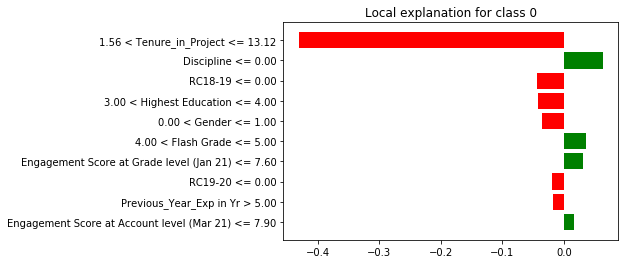

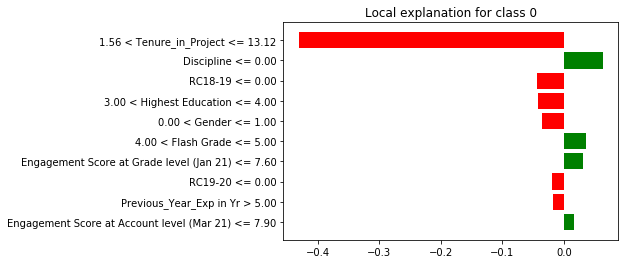

In [204]:
idx = random.randint(1, len(x_test))

print("Prediction : ", gb.predict(x_test[idx].reshape(1,-1))[0])
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(x_test[idx], gb.predict_proba, top_labels=3)

print(explanation.score)
explanation.as_pyplot_figure()